In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("C://Ai-class/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [5]:
openValues = (df[['Open']]).to_numpy()

print(openValues)

[[0.       ]
 [0.       ]
 [0.       ]
 ...
 [2.25     ]
 [2.1099999]
 [2.1099999]]


In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

In [9]:
TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE :]

In [11]:
def make_sample(data,window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [13]:
model = Sequential()
model.add(LSTM(16,
                    input_shape=(X_train.shape[1], 1),
                    activation ='tanh',
                    return_sequences=False)
        )
model.add(Dense(1))

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 20, batch_size = 16)

Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0047
Epoch 2/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0033
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0031
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0034
Epoch 5/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0026
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0025
Epoch 7/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0027
Epoch 8/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0031
Epoch 9/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0031
Epoch 10/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0022
Epoch 11/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0037
Epoch 12/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0029
Epoch 13/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0030
Epoch 14/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0028
Epoch 15/20
505/505 ━━━━━━━━━━━

In [17]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [19]:
mse = mean_squared_error(y_test, pred)

print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 6.550750295786685e-05


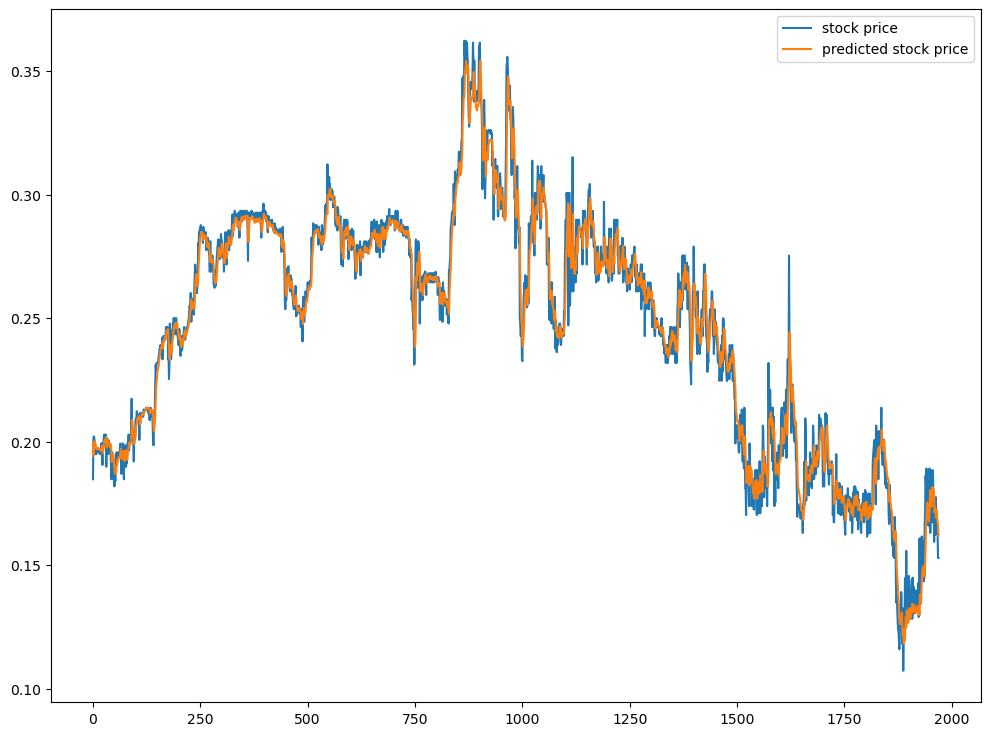

In [21]:
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()